In [1]:
# slightly process metal output to draw manhattan plot
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from scipy.stats import norm

In [2]:
pd.set_option('display.max_columns',None)

In [4]:
# summary_origin = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_A1corr_noMAFfilter_Allcohorts_withPC1.TBL",sep='\t')
# plink_meta_10cohort = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_10cohorts_withPC.meta",sep='\s+')
# plink_meta = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC.meta",sep='\s+')
gwas_samantha = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/gwas_version8_merged.assoc.logistic",sep='\s+')
plink_sDAI = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/TwoCompDAS/RunMeta/Madrid_Vienna_Tacera_sDAI.meta",sep='\s+')
plink_cDAI = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/TwoCompDAS/RunMeta/Madrid_Vienna_cDAI.meta",sep='\s+')

In [5]:
plink_meta_Madrid_Vienna = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/TwoCompDAS/RunMeta/Madrid_Vienna_Tacera_DAS28crp.meta",sep='\s+')
plink_meta_Madrid_Vienna_Tacera = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/TwoCompDAS/RunMeta/Madrid_Vienna_Tacera_DAS28crp.meta",sep='\s+')
#plink_meta_8cohorts = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_MTX8cohorts_allsamples.meta",sep='\s+')

In [8]:
suggestiveHits_plink = plink_cDAI[plink_cDAI['P']<=1E-5].sort_values("P")
len(suggestiveHits_plink) 

0

In [9]:
significant_plink = plink_cDAI[plink_cDAI['P']<=5E-8].sort_values("P")
len(significant_plink) 

0

In [6]:
OR = np.exp(summary_origin['Effect'])
summary_origin.insert(6,'OR',OR)

In [7]:
SNP = gwas_samantha['SNP'].str.split(':',expand=True)[0]+":"+gwas_samantha['SNP'].str.split(':',expand=True)[1]+":"+gwas_samantha['A1']
gwas_samantha['SNP'] = SNP

In [10]:
#check carefully how it's generated before using Merged variable
Merged_cDAI = pd.merge(plink_meta_Madrid_Vienna,plink_cDAI,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_DAS28crp","_cDAI"))
Merged_cDAI

,CHR_DAS28crp,BP_DAS28crp,SNP,A1_DAS28crp,A2_DAS28crp,N_DAS28crp,P_DAS28crp,P(R)_DAS28crp,OR_DAS28crp,OR(R)_DAS28crp,Q_DAS28crp,I_DAS28crp,CHR_cDAI,BP_cDAI,A1_cDAI,A2_cDAI,N_cDAI,P_cDAI,P(R)_cDAI,OR_cDAI,OR(R)_cDAI,Q_cDAI,I_cDAI
0,1,24470644,1:24470644:A,A,?,2,0.33230,0.33230,1.3873,1.3873,0.8479,0.00,1,24470644,A,?,2,0.93070,0.93070,0.9636,0.9636,0.6754,0.00
1,1,157755145,1:157755145:T,T,?,2,0.14550,0.14550,2.3126,2.3126,0.3647,0.00,1,157755145,T,?,2,0.08124,0.08124,3.0884,3.0884,0.3842,0.00
2,2,4117199,2:4117199:G,G,?,2,0.05211,0.05211,1.3418,1.3418,0.8999,0.00,2,4117199,G,?,2,0.02617,0.13070,1.5441,1.4775,0.2224,32.84
3,2,4118282,2:4118282:G,G,?,2,0.06446,0.06446,1.3263,1.3263,0.9163,0.00,2,4118282,G,?,2,0.03720,0.40090,1.5163,1.3489,0.1279,56.85
4,2,4122930,2:4122930:T,T,?,2,0.05465,0.05465,1.3437,1.3437,0.8243,0.00,2,4122930,T,?,2,0.04496,0.54180,1.4970,1.2811,0.0937,64.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,16,77702804,16:77702804:C,C,?,2,0.79130,0.79130,0.9471,0.9471,0.5557,0.00,16,77702804,C,?,2,0.97880,0.97880,1.0074,1.0074,0.3506,0.00
94,17,6233478,17:6233478:C,C,?,2,0.03280,0.51320,0.6612,0.7709,0.0865,65.97,17,6233478,C,?,2,0.54460,0.54460,1.1533,1.1533,0.6455,0.00
95,17,6236228,17:6236228:A,A,?,3,0.02402,0.23160,0.6982,0.7518,0.1367,49.74,17,6236228,A,?,2,0.53390,0.53390,1.1578,1.1578,0.6535,0.00
96,17,13305606,17:13305606:A,A,?,2,0.02121,0.06223,0.5697,0.5287,0.2303,30.52,17,13305606,A,?,2,0.86070,0.86070,0.9499,0.9499,0.9046,0.00


<AxesSubplot:xlabel='OR_DAS28crp', ylabel='OR_cDAI'>

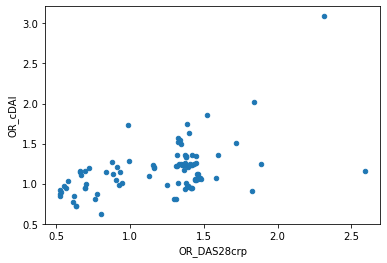

In [20]:
Merged_cDAI.plot(x='OR_DAS28crp',y='OR_cDAI',kind='scatter')

In [15]:
#check carefully how it's generated before using Merged variable
Merged_sDAI = pd.merge(plink_meta_Madrid_Vienna_Tacera,plink_sDAI,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_DAS28crp","_sDAI"))
Merged_sDAI

,CHR_DAS28crp,BP_DAS28crp,SNP,A1_DAS28crp,A2_DAS28crp,N_DAS28crp,P_DAS28crp,P(R)_DAS28crp,OR_DAS28crp,OR(R)_DAS28crp,Q_DAS28crp,I_DAS28crp,CHR_sDAI,BP_sDAI,A1_sDAI,A2_sDAI,N_sDAI,P_sDAI,P(R)_sDAI,OR_sDAI,OR(R)_sDAI,Q_sDAI,I_sDAI
0,1,24470644,1:24470644:A,A,?,2,0.33230,0.33230,1.3873,1.3873,0.8479,0.00,1,24470644,A,?,2,0.9039,0.9039,1.0565,1.0565,0.6793,0.00
1,1,157755145,1:157755145:T,T,?,2,0.14550,0.14550,2.3126,2.3126,0.3647,0.00,1,157755145,T,?,2,0.0466,0.0466,4.0008,4.0008,0.5549,0.00
2,2,4117199,2:4117199:G,G,?,2,0.05211,0.05211,1.3418,1.3418,0.8999,0.00,2,4117199,G,?,2,0.1651,0.1651,1.3324,1.3324,0.5017,0.00
3,2,4118282,2:4118282:G,G,?,2,0.06446,0.06446,1.3263,1.3263,0.9163,0.00,2,4118282,G,?,2,0.2312,0.3417,1.2881,1.2592,0.2813,13.87
4,2,4122930,2:4122930:T,T,?,2,0.05465,0.05465,1.3437,1.3437,0.8243,0.00,2,4122930,T,?,2,0.2746,0.5902,1.2621,1.1778,0.2160,34.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,16,77702804,16:77702804:C,C,?,2,0.79130,0.79130,0.9471,0.9471,0.5557,0.00,16,77702804,C,?,2,0.6264,0.6264,0.8623,0.8623,0.3876,0.00
93,17,6233478,17:6233478:C,C,?,2,0.03280,0.51320,0.6612,0.7709,0.0865,65.97,17,6233478,C,?,2,0.4740,0.4740,1.1984,1.1984,0.5258,0.00
94,17,6236228,17:6236228:A,A,?,3,0.02402,0.23160,0.6982,0.7518,0.1367,49.74,17,6236228,A,?,3,0.6280,0.6280,1.0986,1.0986,0.7040,0.00
95,17,13305606,17:13305606:A,A,?,2,0.02121,0.06223,0.5697,0.5287,0.2303,30.52,17,13305606,A,?,2,0.3686,0.3686,0.7391,0.7391,0.9004,0.00


<AxesSubplot:xlabel='OR_DAS28crp', ylabel='OR_sDAI'>

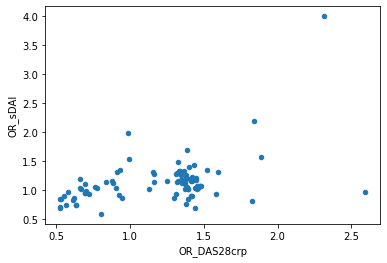

In [21]:
Merged_sDAI.plot(x='OR_DAS28crp',y='OR_sDAI',kind='scatter')

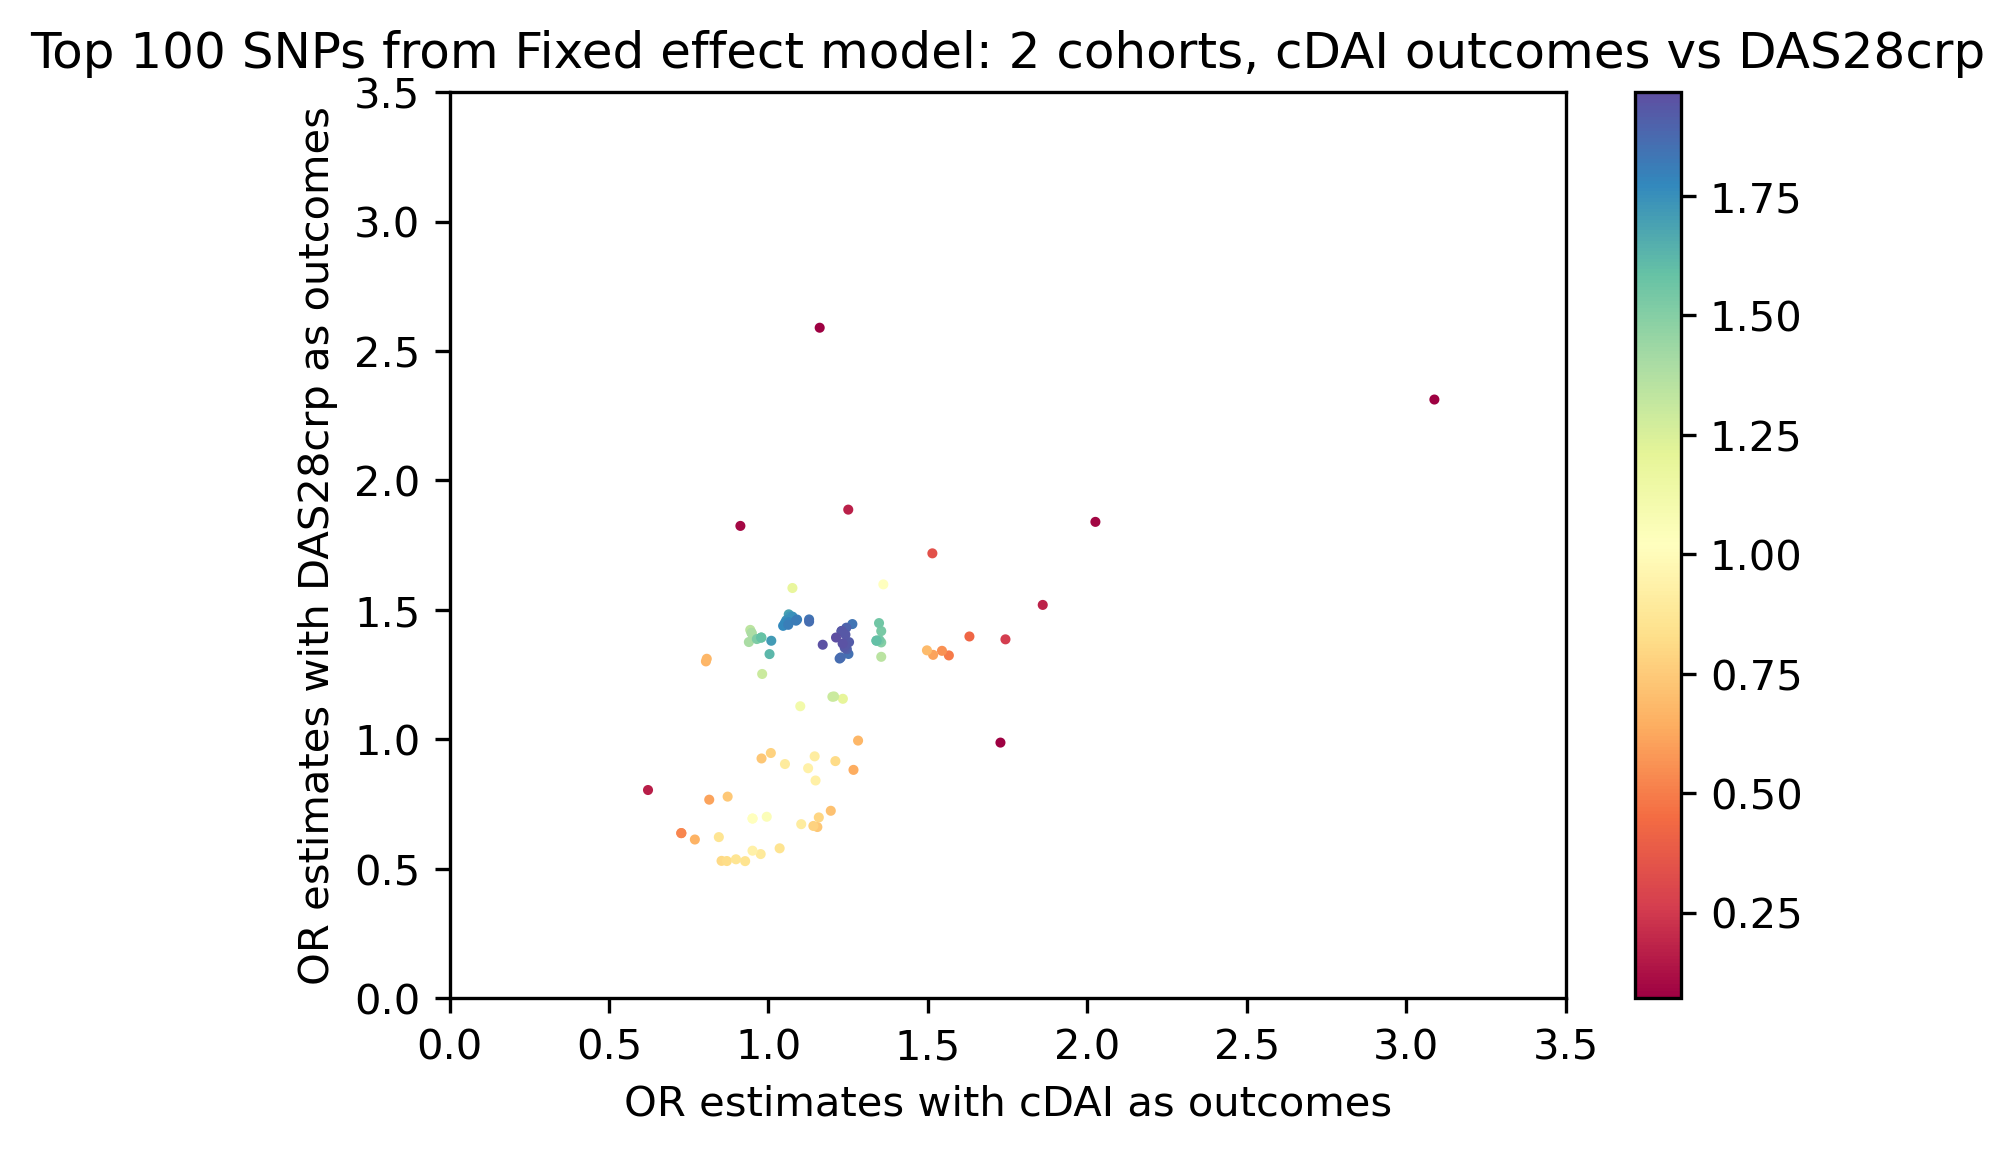

In [35]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 100 SNPs from Fixed effect model: 2 cohorts, cDAI outcomes vs DAS28crp',fontsize=12)

plt.xlabel('OR estimates with cDAI as outcomes')
plt.ylabel('OR estimates with DAS28crp as outcomes')

x = Merged_cDAI['OR_cDAI']
y = Merged_cDAI['OR_DAS28crp']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


plt.xlim([0,3.5])
plt.ylim([0,3.5])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
# plt.scatter(x, y, s=2)

plt.colorbar()
plt.show()

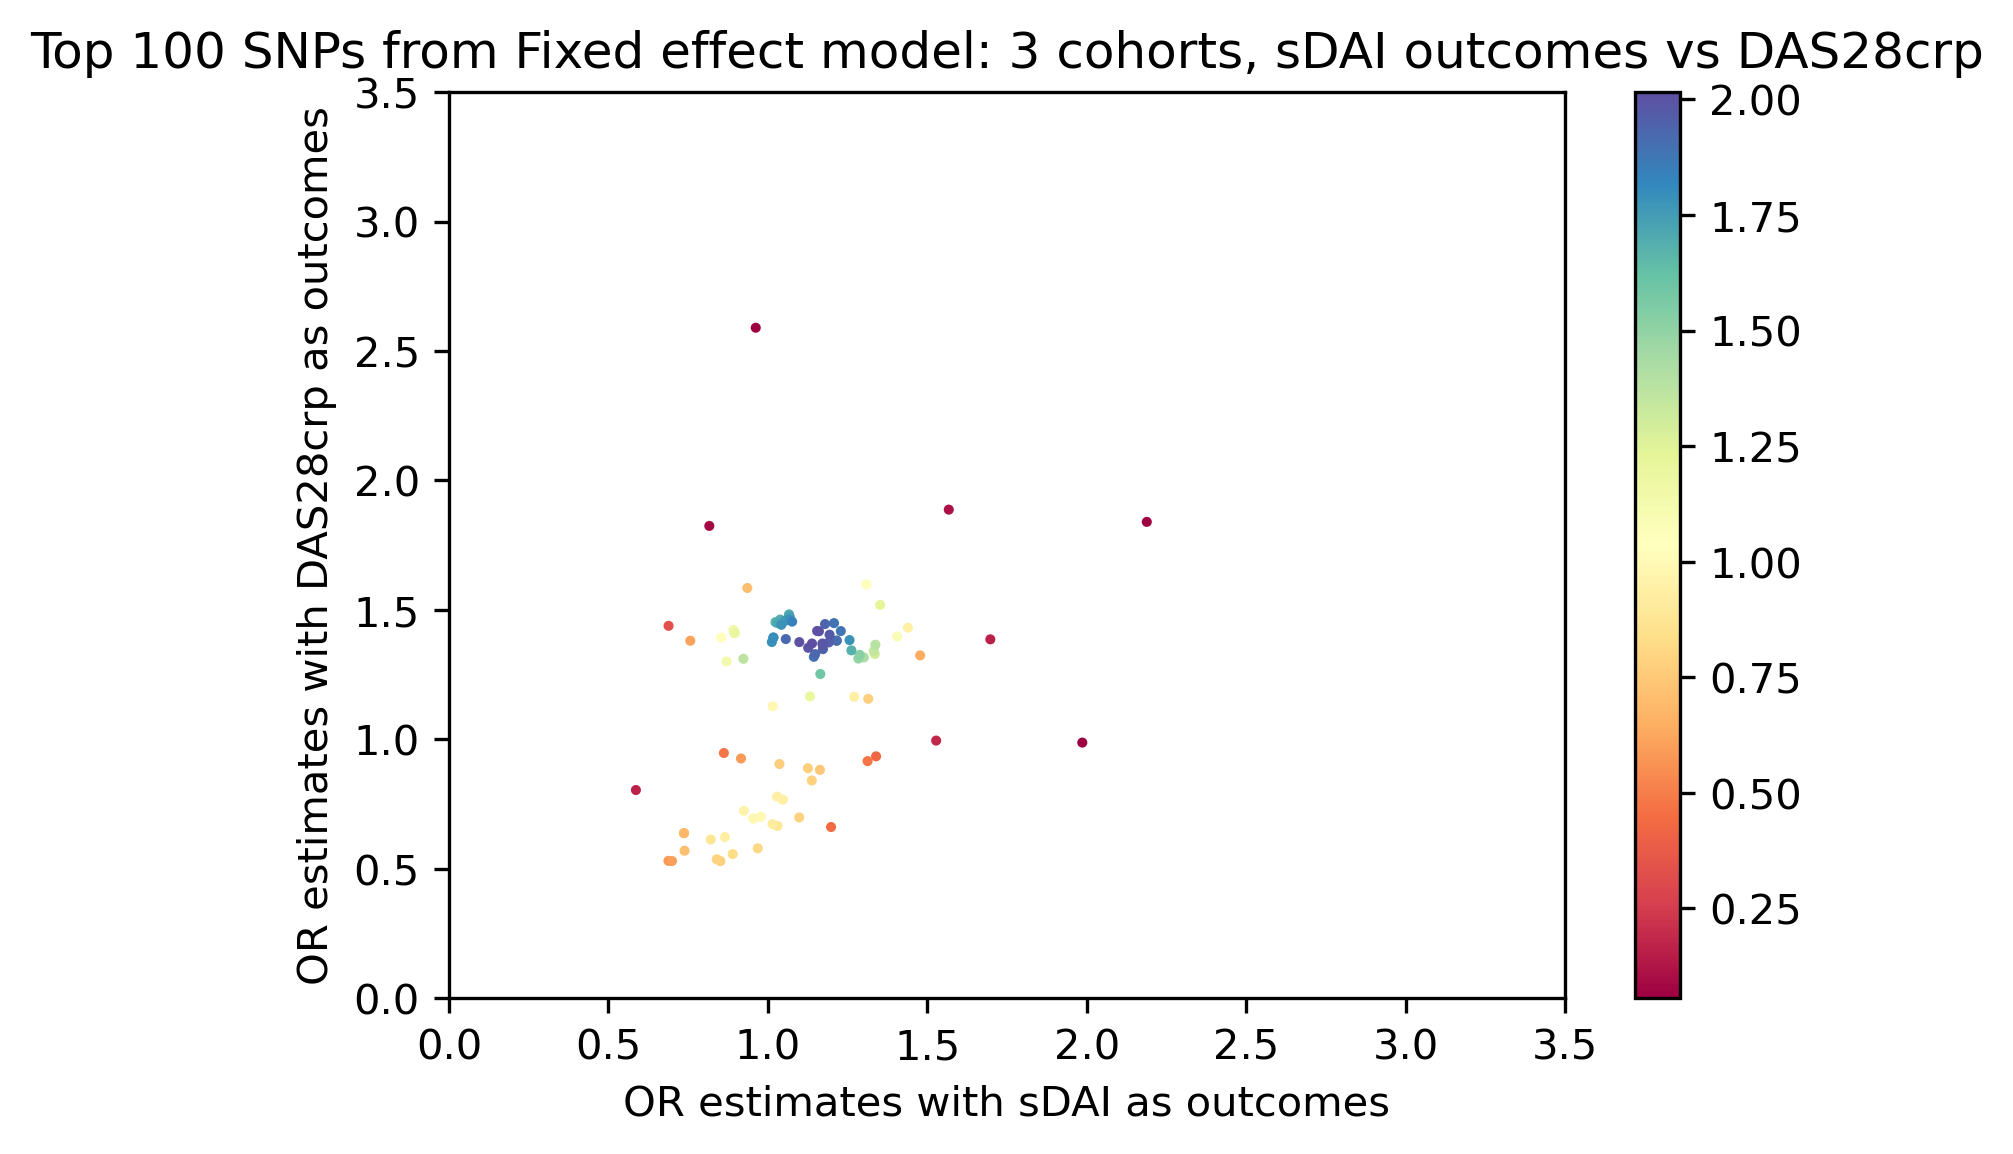

In [36]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 100 SNPs from Fixed effect model: 3 cohorts, sDAI outcomes vs DAS28crp',fontsize=12)

plt.xlabel('OR estimates with sDAI as outcomes')
plt.ylabel('OR estimates with DAS28crp as outcomes')

x = Merged_sDAI['OR_sDAI']
y = Merged_sDAI['OR_DAS28crp']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


plt.xlim([0,3.5])
plt.ylim([0,3.5])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
# plt.scatter(x, y, s=2)

plt.colorbar()
plt.show()

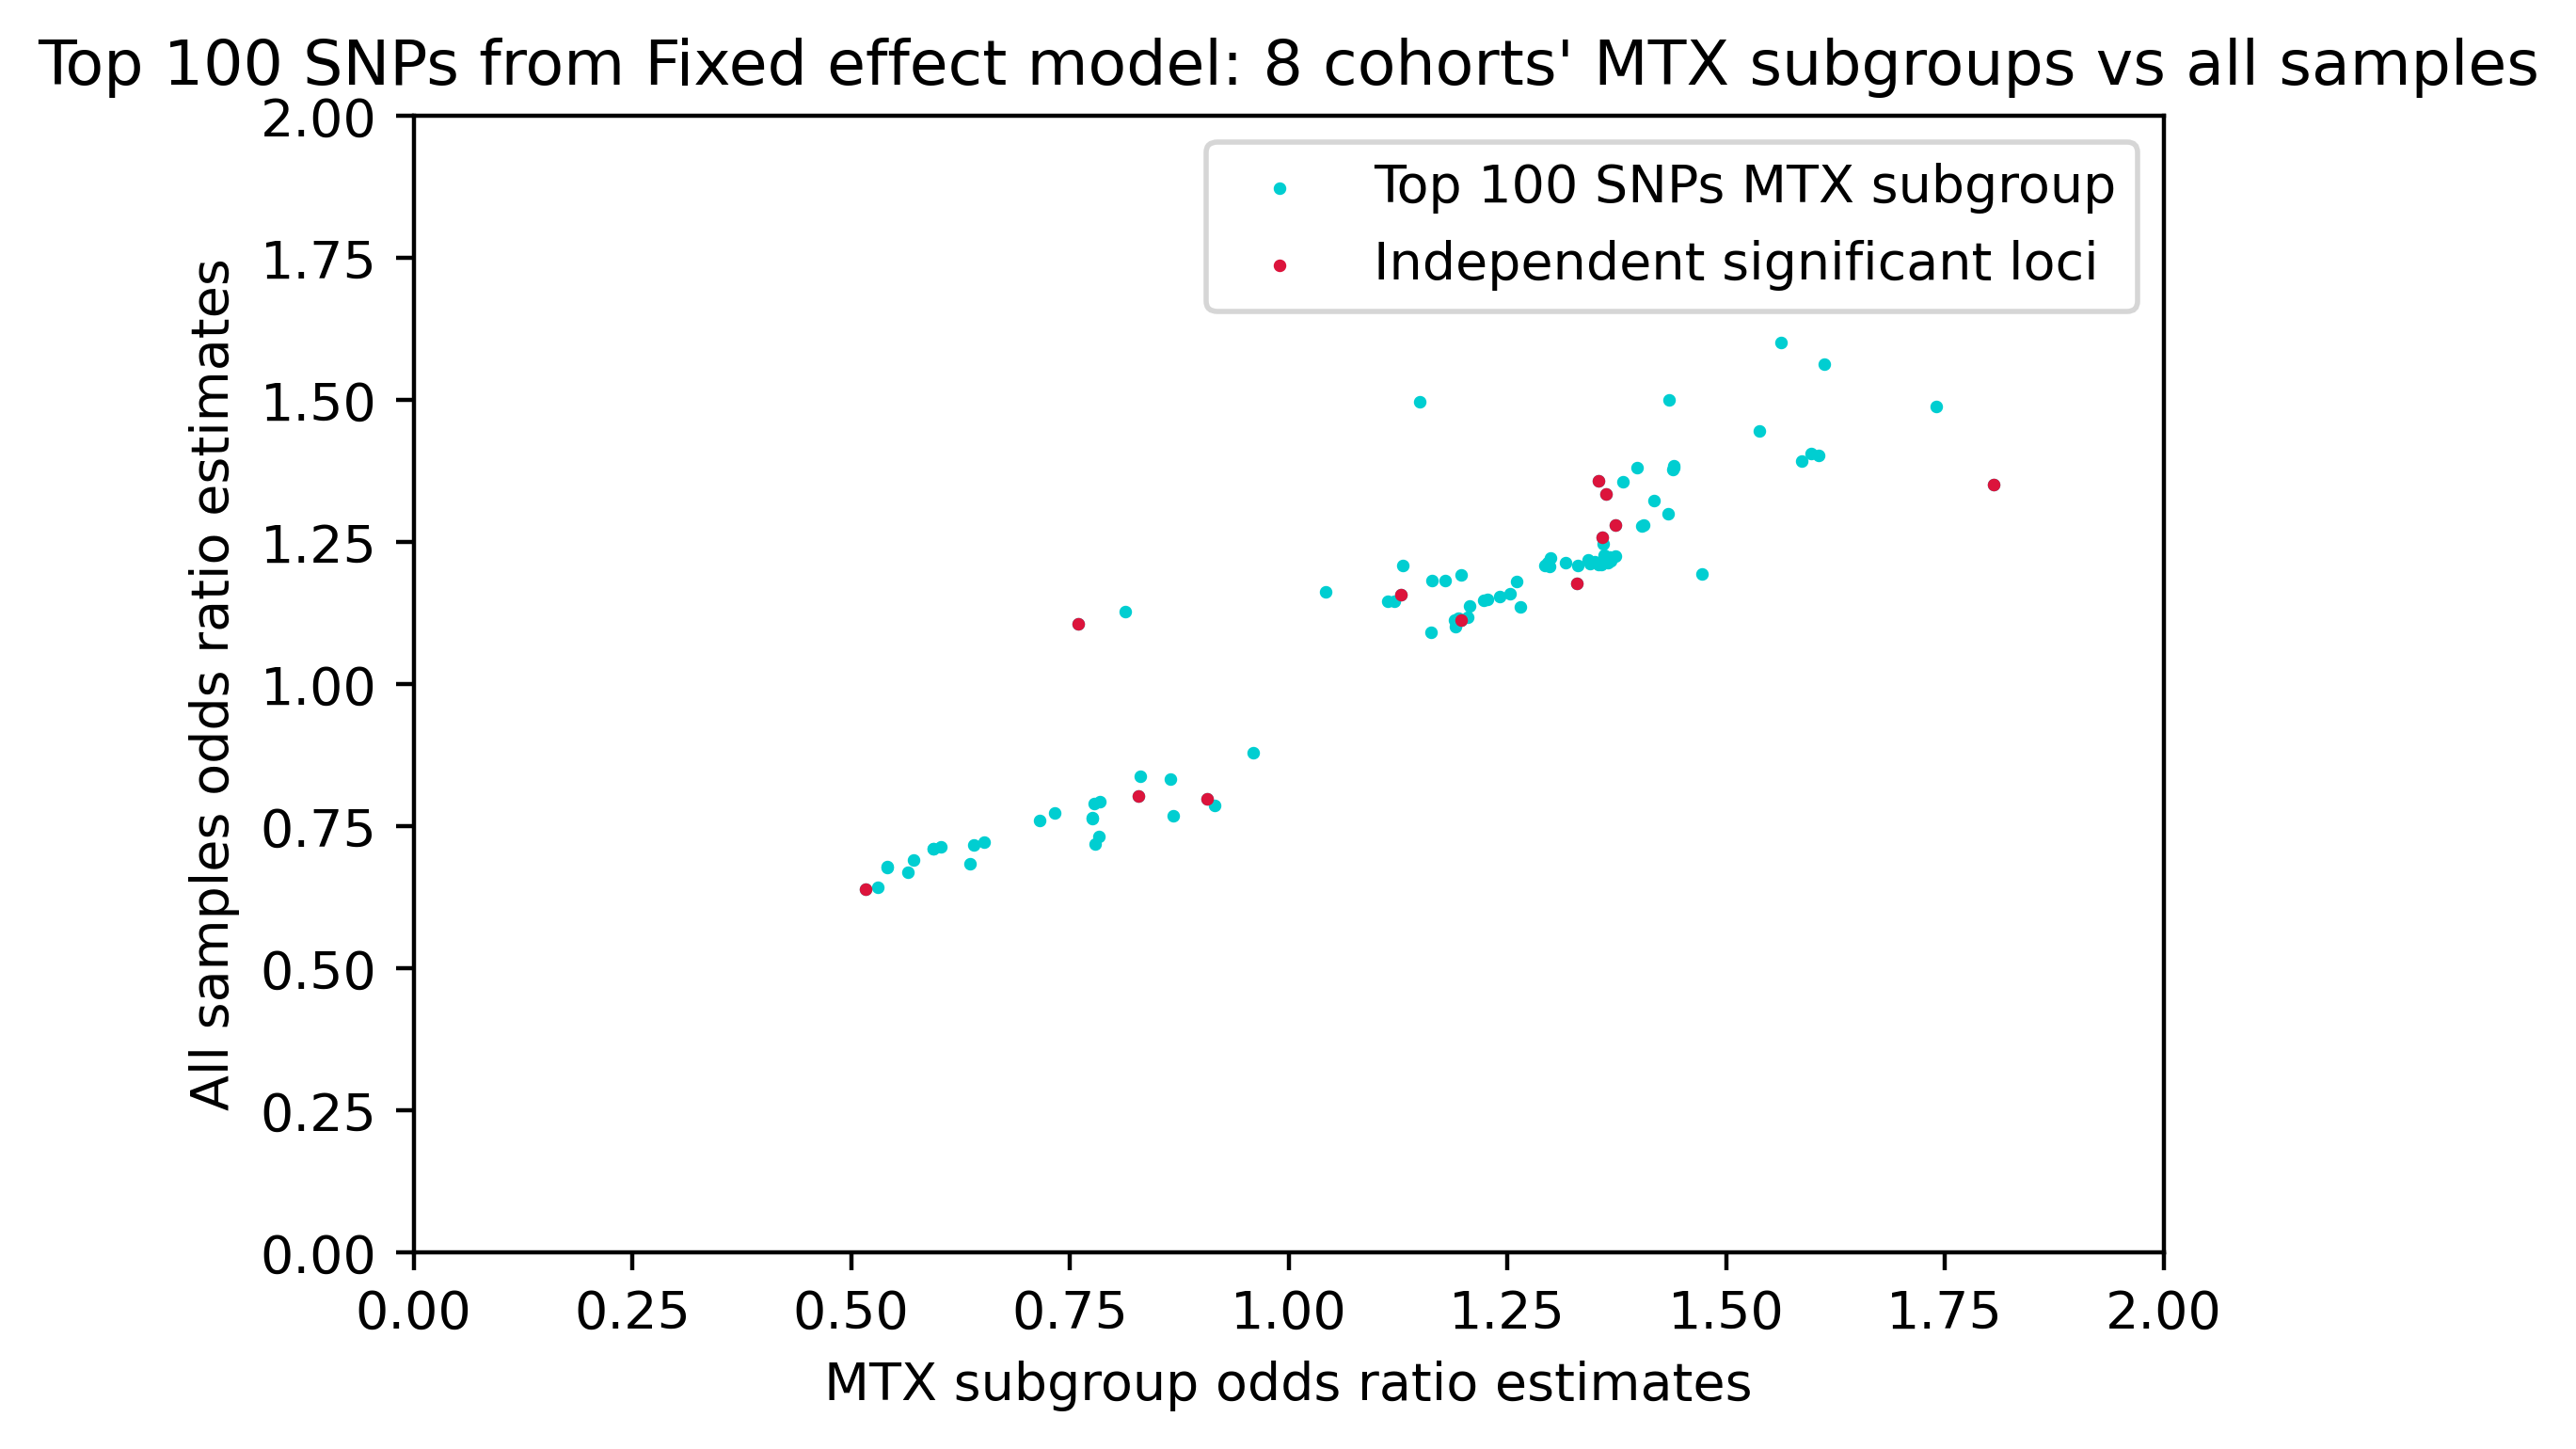

In [27]:
#SCATTER PLOT Odds ratio
plt.figure(dpi=400)
plt.title('Top 100 SNPs from Fixed effect model: 8 cohorts\' MTX subgroups vs all samples',fontsize=12)

plt.xlabel('MTX subgroup odds ratio estimates')
plt.ylabel('All samples odds ratio estimates')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
plt.xlim([0,2])
plt.ylim([0,2])
plt.scatter(Merged['OR_MTXsubgroup'],Merged['OR_latest_meta'],c=colors1,label='Top 100 SNPs MTX subgroup',s=2)
plt.scatter(Merged_IndsigSNPs['OR_MTXsubgroup'],Merged_IndsigSNPs['OR_latest_meta'],c=colors2,label='Independent significant loci',s=2)


# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability